In [111]:
import csv
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np
from kneed import DataGenerator, KneeLocator

In [112]:
df = pd.read_csv('data_final_project_4states.csv')
df

,Unnamed: 0,ID,Start_Time,County,State,Severity,Start_Lat,Start_Lng,Sunrise_Sunset,Weekday,Hour,Month
0,1012,A-2717612,2016-03-22 18:53:11,El Dorado,CA,3,38.825840,-120.029214,Day,1,18,3
1,1013,A-2717613,2016-03-22 19:00:49,Santa Clara,CA,2,37.358209,-121.840017,Day,1,19,3
2,1014,A-2717614,2016-03-22 20:07:32,Alameda,CA,3,37.881943,-122.307987,Night,1,20,3
3,1015,A-2717615,2016-03-22 21:40:18,Alameda,CA,2,37.881038,-122.307788,Night,1,21,3
4,1016,A-2717616,2016-03-22 21:36:42,Sacramento,CA,2,38.518811,-121.101664,Night,1,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...
708081,1516059,A-4239402,2019-08-23 18:03:25,Riverside,CA,2,34.002480,-117.379360,Day,4,18,8
708082,1516060,A-4239403,2019-08-23 19:11:30,San Diego,CA,2,32.766960,-117.148060,Day,4,19,8
708083,1516061,A-4239404,2019-08-23 19:00:21,Orange,CA,2,33.775450,-117.847790,Day,4,19,8
708084,1516062,A-4239405,2019-08-23 19:00:21,Los Angeles,CA,2,33.992460,-118.403020,Day,4,19,8


In [113]:
county_info = pd.read_csv('Accident_Count_Per_Top10County&State.csv')
county_info

,County,Counts,State
0,Los Angeles,138817,CA
1,San Bernardino,30251,CA
2,Orange,29670,CA
3,San Diego,26623,CA
4,Sacramento,25941,CA
5,Alameda,25285,CA
6,Riverside,24707,CA
7,Santa Clara,18772,CA
8,Contra Costa,12953,CA
9,Kern,10101,CA


In [114]:
df_CA = df.loc[df['State']=='CA', ['County', 'Start_Lat', 'Start_Lng']].dropna(how="any")
df_CA

,County,Start_Lat,Start_Lng
0,El Dorado,38.825840,-120.029214
1,Santa Clara,37.358209,-121.840017
2,Alameda,37.881943,-122.307987
3,Alameda,37.881038,-122.307788
4,Sacramento,38.518811,-121.101664
...,...,...,...
708081,Riverside,34.002480,-117.379360
708082,San Diego,32.766960,-117.148060
708083,Orange,33.775450,-117.847790
708084,Los Angeles,33.992460,-118.403020


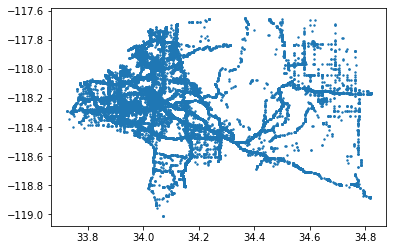

In [115]:
df_CA_1 = df_CA.loc[df_CA['County']==county_info['County'][0], ['Start_Lat', 'Start_Lng']]
loc = df_CA_1.values
plt.scatter(loc[:, 0], loc[:, 1], s=2)

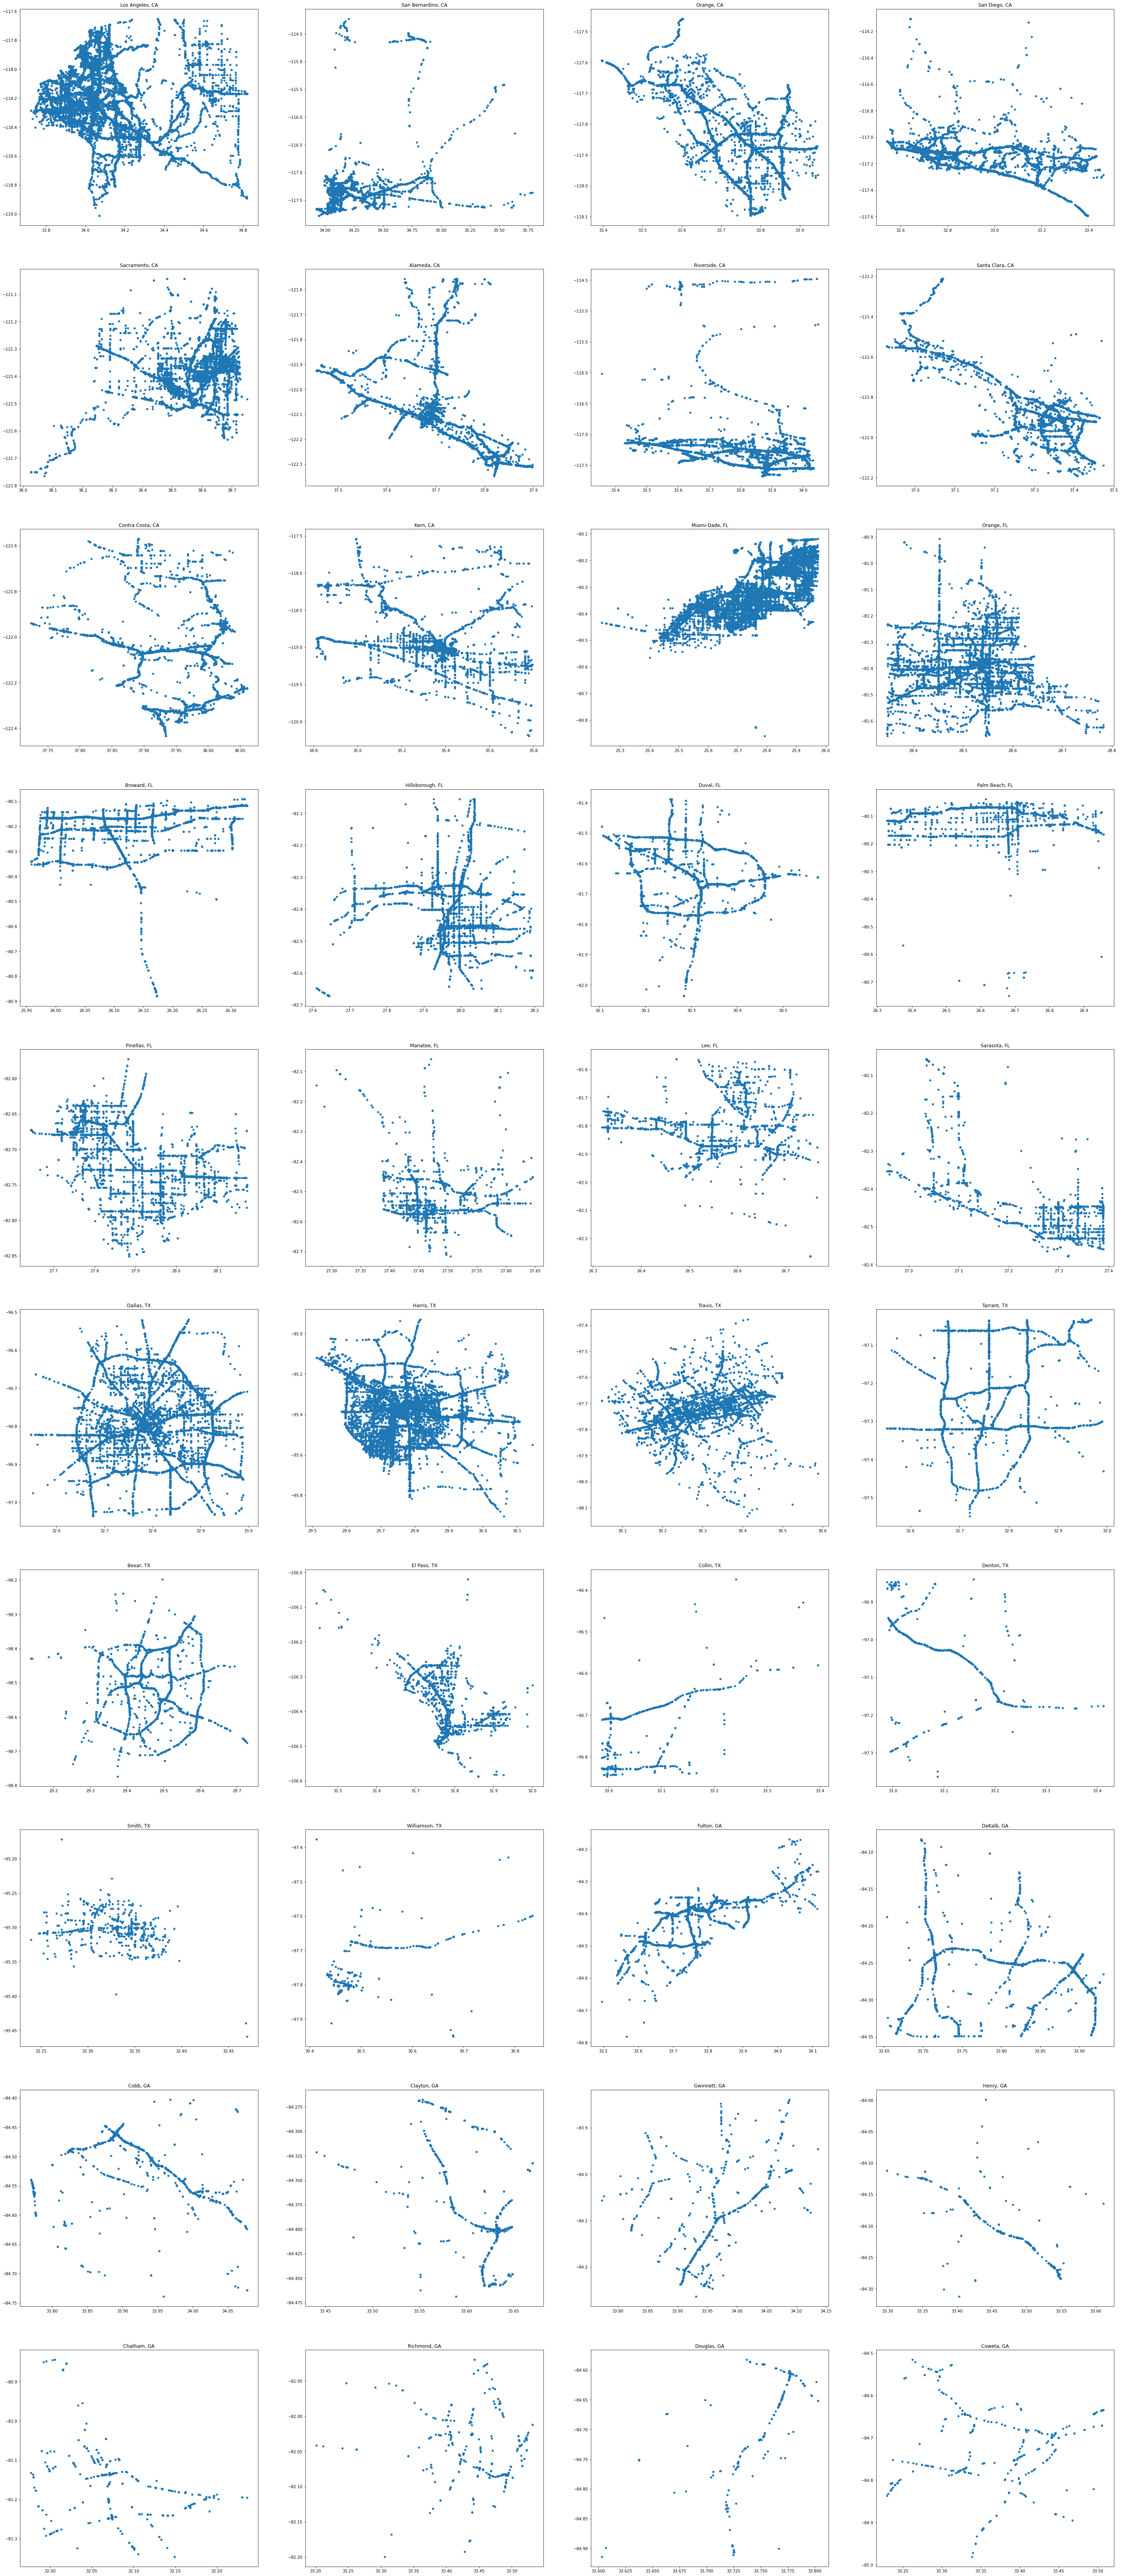

In [101]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lat', 'Start_Lng']]
    location = county_acc.values
    axes[i//4][i%4].scatter(location[:, 0], location[:, 1], s=20)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])

<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/li

<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/li

<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/li

<ipython-input-119-968d369947fa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_info.loc[i]['n_center'] = kl.elbow
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


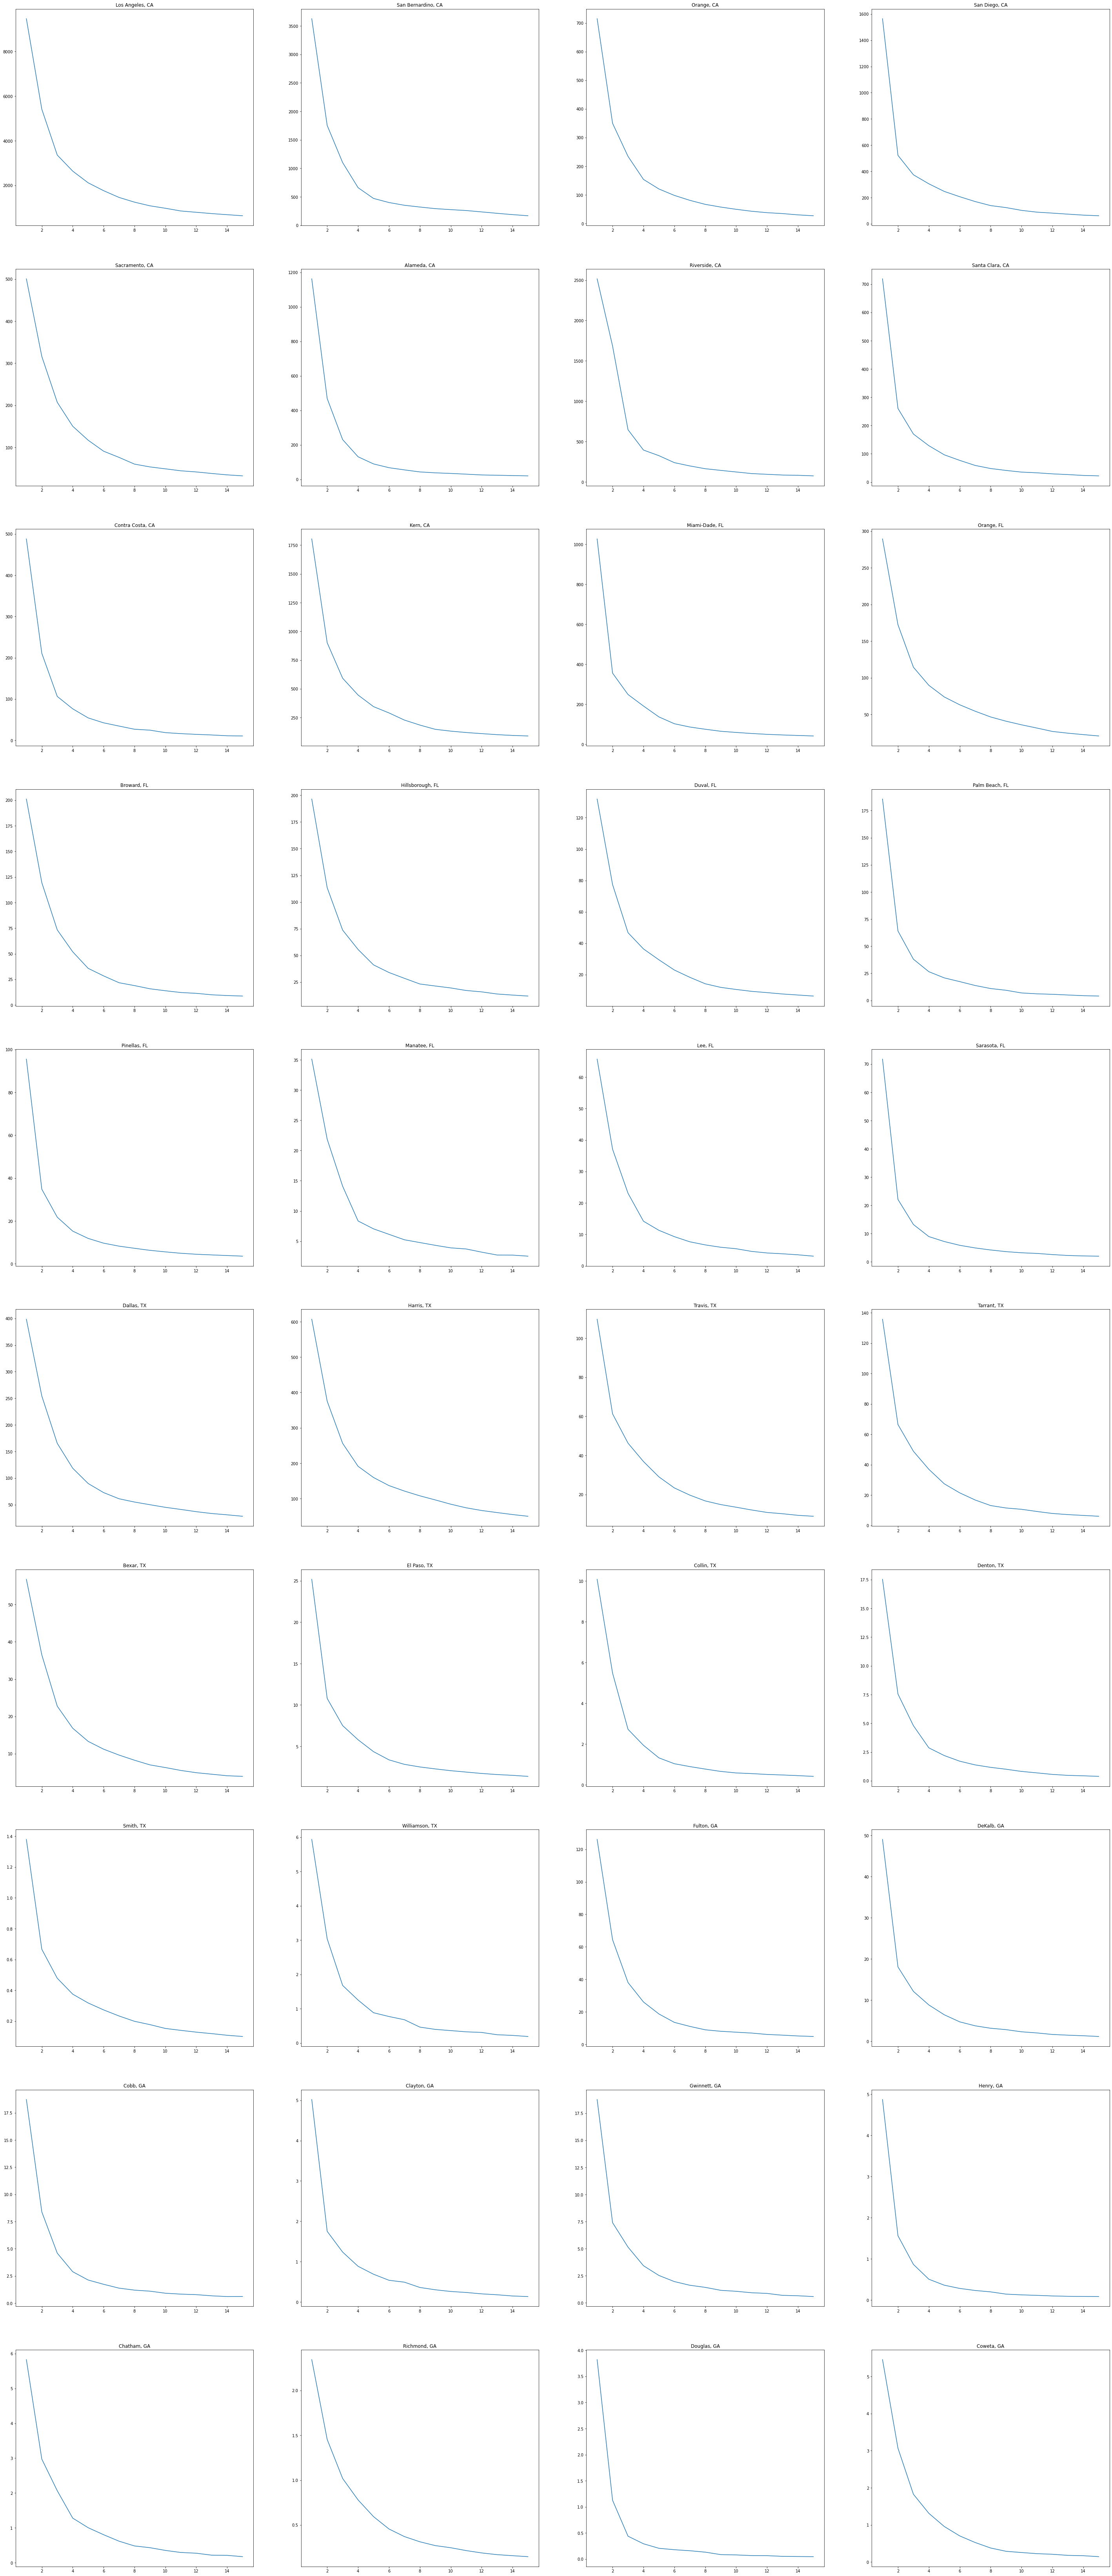

In [119]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lat', 'Start_Lng']]
    location = county_acc.values
    sse = []
    kmeans_kwargs = {
       "init": "random",
       "n_init": 15,
       "max_iter": 300,
       "random_state": 42,
       }
    for k in range(1, 16):
       kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
       kmeans.fit(location)
       sse.append(kmeans.inertia_)
    axes[i//4][i%4].plot(range(1, 16), sse)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])
    kl = KneeLocator(
       range(1, 16), sse, curve="convex", direction="decreasing"
       )
    county_info.loc[i]['n_center'] = kl.elbow

In [123]:
county_info.to_csv("county_n_center.csv")

,County,Counts,State
0,Los Angeles,138817,CA
1,San Bernardino,30251,CA
2,Orange,29670,CA
3,San Diego,26623,CA
4,Sacramento,25941,CA
5,Alameda,25285,CA
6,Riverside,24707,CA
7,Santa Clara,18772,CA
8,Contra Costa,12953,CA
9,Kern,10101,CA


KeyError: 'n_center'

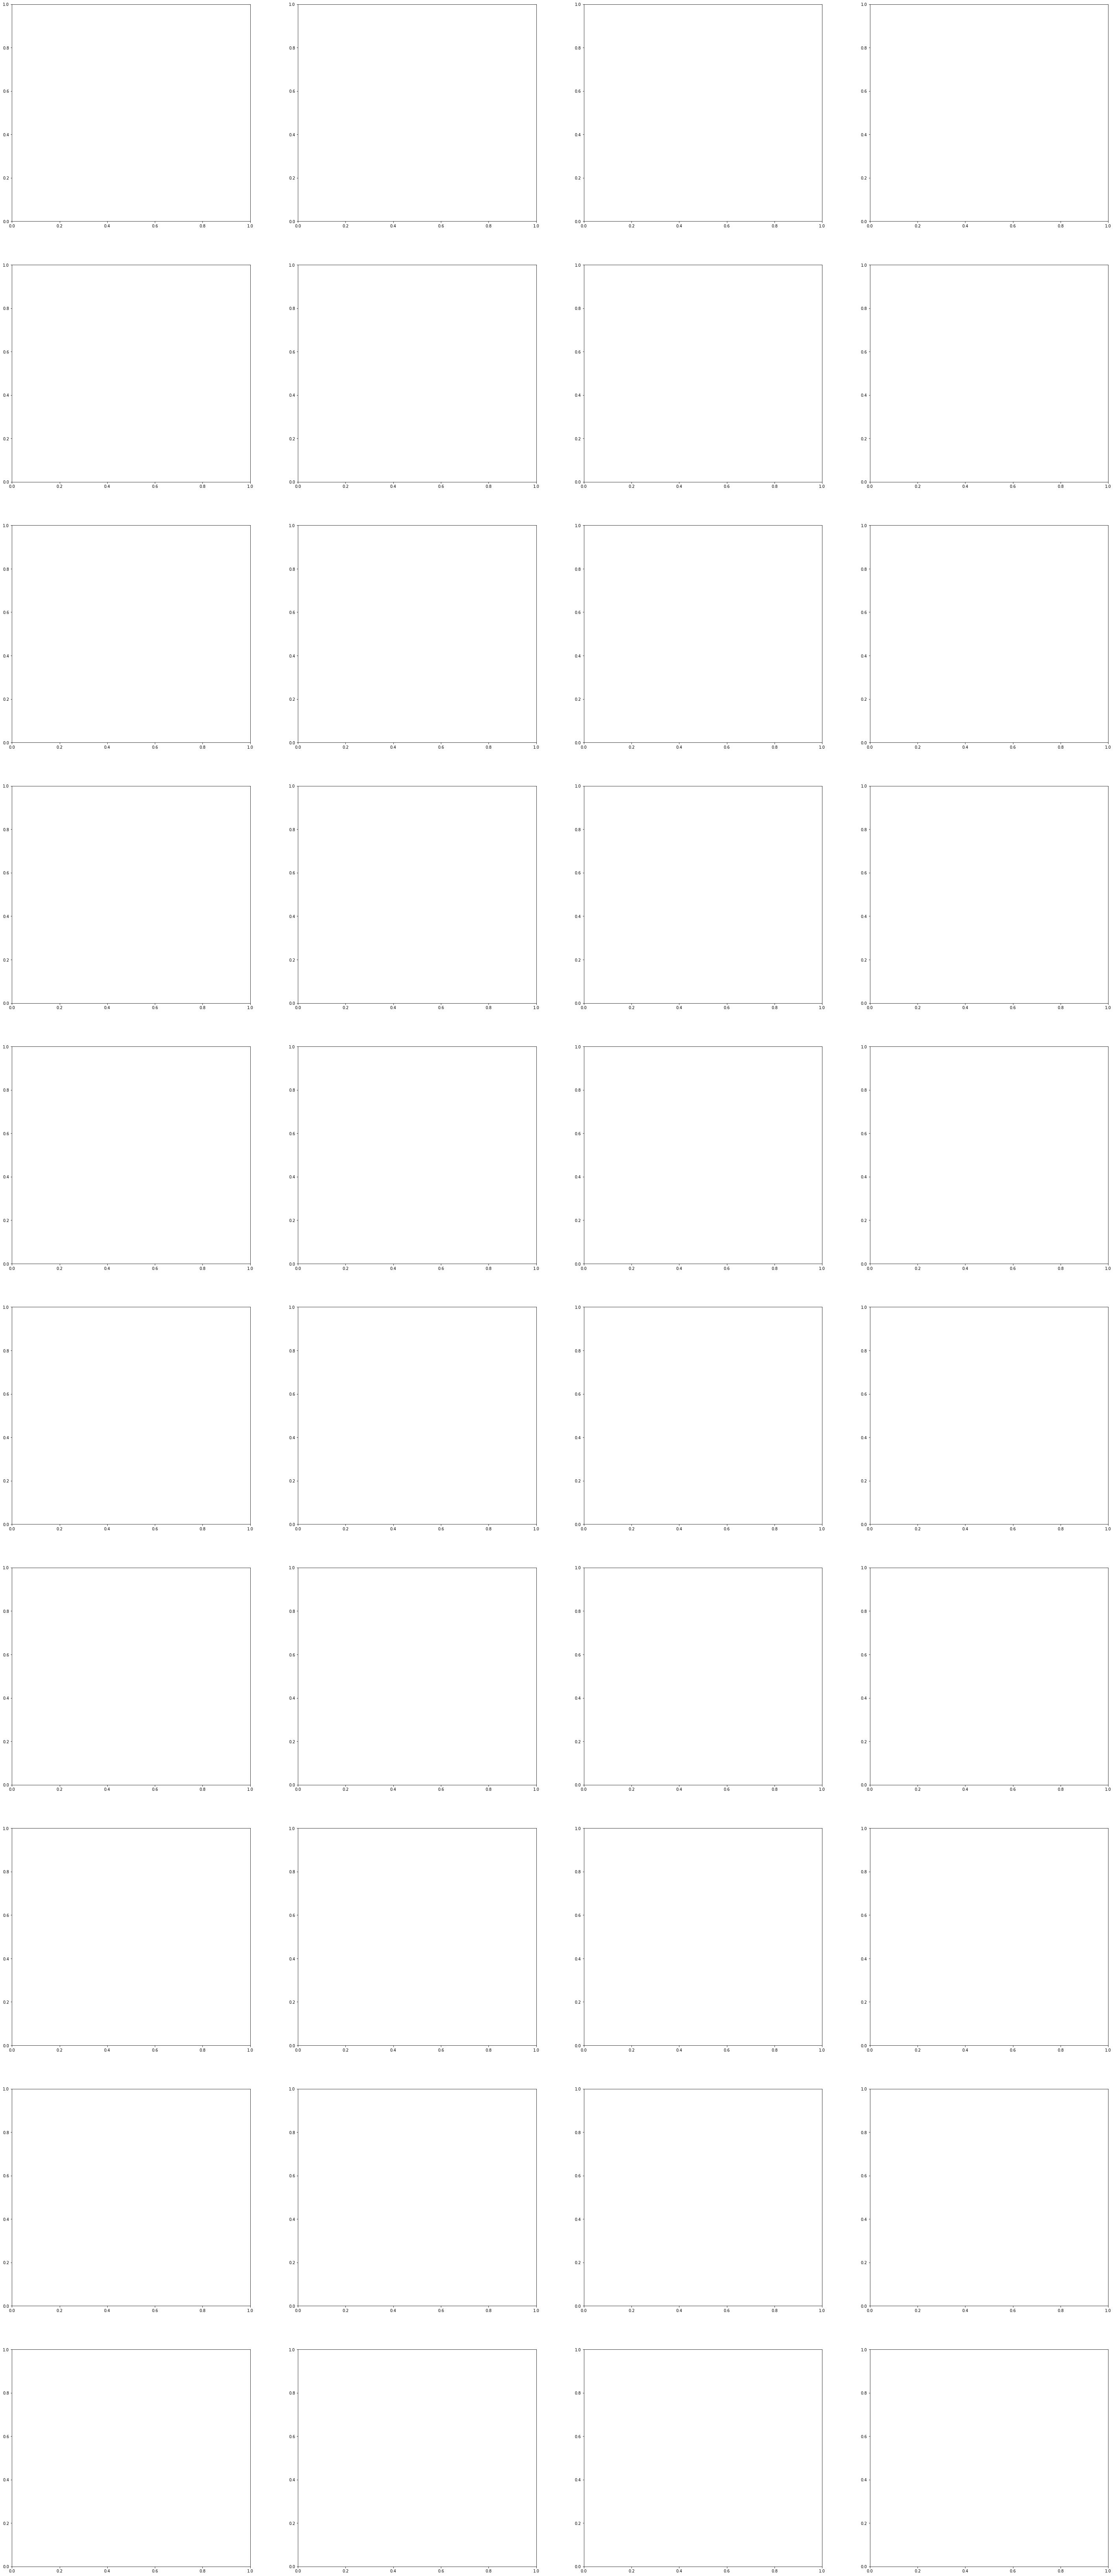

In [124]:
figure, axes = plt.subplots(10, 4, figsize=(50, 120))
for i in range(40):
    county_acc = df.loc[(df['County']==county_info['County'][i]) & (df['State']==county_info['State'][i]), ['Start_Lat', 'Start_Lng']]
    location = county_acc.values
    n = county_info.loc[i]['n_center']
    kmeans = KMeans(n_clusters=n, random_state=0).fit(location)
    y_kmeans = kmeans.predict(location)
    axes[i//4][i%4].scatter(location[:, 0], location[:, 1], c=y_kmeans, s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    axes[i//4][i%4].scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
    axes[i//4][i%4].title.set_text(county_info['County'][i] + ', ' + county_info['State'][i])